8


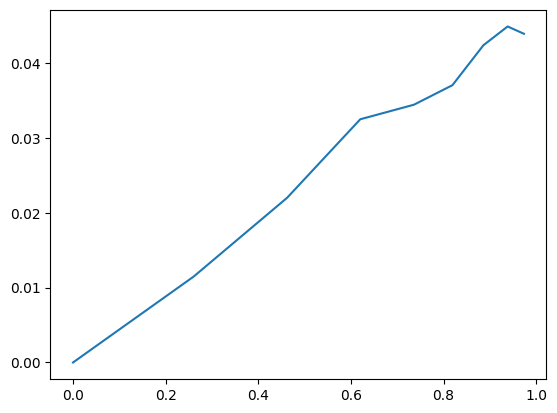

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


def pol(r, theta):
  return r*np.array([np.cos(theta), np.sin(theta)])

mod = lambda x: np.sqrt(np.dot(x, x))

def sawconf(sequence, nh=3, nt=0.34):
  max_a = 2*np.pi/(nh+2)
  pts = [np.array([0, 0])]
  th = 0
  for i in range(len(sequence)):
    new_a = 2*max_a*random.random()-max_a
    th += new_a
    new_dir = pol(nt, th)
    pts.append(pts[-1] + new_dir)
  return pts
  """
  fig, ax = plt.subplots()
  for k in range(1, len(pts)):
    ax.arrow(pts[k-1][0], pts[k-1][1], \
             pts[k][0] - pts[k-1][0], pts[k][1] - pts[k-1][1])
  return fig
  """

def iterate_conf(sequence, iters=10, nh=3, nt=0.34):
  print(len(sequence))
  posarray = []
  for k in range(iters):
    posarray.append(sawconf(sequence, nh=nh, nt=nt))
  posarray = np.array(posarray)
  posarray = np.mean(posarray, axis=0)
  plt.plot(posarray[:, 0], posarray[:, 1])


iterate_conf("AAAAAAAA", iters=1000, nh=3, nt=0.34)
#fig = sawconf('AAAAAA')

In [77]:
def p_mat_conf(sequence):
  compl = {
      'A': ['T', 'U'],
      'T': ['A'],
      'U': ['A', 'G'],
      'G': ['C', 'U'],
      'C': ['G']
  }
  n = len(sequence)
  p = np.zeros((n, n))
  idxs = []
  for i in range(n):
    for j in range(n):
      idxs.append((i, j))
      if i != j and sequence[i] in compl[sequence[j]] and abs(i-j) > 3:
        p[i, j] += 1
        p[j, i] += 1
  p /= np.sum(p)
  p_ij = dict(zip(idxs, p.flatten()))
  chosen = []
  while len(list(p_ij.values())) != 0:
    x = np.random.choice(range(len(list(p_ij.keys()))), p=list(p_ij.values()))
    (i, j) = list(p_ij.keys())[x]
    p_ij = {(k, l): val for (y, ((k, l), val)) in enumerate(p_ij.items()) \
            if (
                k != i and k != j and l != i and l != j and \
                not ((k in range(i, j) and not l in range(i, j)) or
                     (not k in range(i, j) and l in range(i, j)))
            )}
    keys = list(p_ij.keys())
    vals = list(p_ij.values())
    if np.sum(vals) == 0:
      break
    vals /= np.sum(vals)
    p_ij = dict(zip(keys, vals))
    chosen.append((i, j))
  dot_bracket = ['.' for k in range(n)]
  for ch in chosen:
    (i, j) = (np.min(ch), np.max(ch))
    dot_bracket[i] = '('
    dot_bracket[j] = ')'
  return ''.join(dot_bracket)

seq = ''.join([random.choice('AUCG') for k in range(200)])
db = p_mat_conf(seq)
print(seq)
print(db)

GGGAGCUUCUCCAGUCGACACGCCAUGCUGUUACUGCUAAAAUUAGGCAGGUGUACUCUCGUAUGUAGUCAUGUCGUCCCAUCGGAAGCUUAGGUGUAACCAUAACAGGCAGCUUUGAUCGACUCAAGCCUUCUUCAUUUUGGACACCACAAAUGCCUUAUGGGAAGGCGAAAGCACAUAGGAUGCCAUAAUUCUCACUU
((((.(((.(.)()(((....(.(..(.)((...)(.(...))).()((((.().(..))))((((.(((....(((...)).))..(.(...)(((())).))))))()....))....).)))(((....)))..)((((((()).(.....)())).)).))))(().(()).....))))(...)((().).).))
